In [1]:
import ssm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import argparse
import pandas as pd
import seaborn as sns
import scipy

In [4]:
# formatting options for plots

SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
# plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure tit
plt.rc('lines', linewidth=1)
cols = ['#ff7f00', '#4daf4a', '#377eb8']
plt.rcParams['font.sans-serif'] = "Helvetica"

cols_glms = ['steelblue', '#D85427', 'tab:green']
# cols_traces = ['tab:blue', 'tab:orange', 'tab:gray', 'tab:purple']
# cols_traces = [ '#BE1F24', '#AA4499', 'tab:gray', '#2E3192',]
# cols_traces = ['#BE1F24', '#2E3192']
cols_vary = ['plum', 'violet', 'purple', 'tab:red']

In [5]:
# Set the parameters of the IO-HMM
num_states = 3        # number of discrete states
obs_dim = 1           # number of observed dimensions
num_categories = 2    # number of categories for output
input_dim = 2         # input dimensions

# Make an IO-HMM
true_iohmm = ssm.HMM(num_states, obs_dim, input_dim, observations="input_driven_obs", 
                   observation_kwargs=dict(C=num_categories), transitions="standard")
gen_weights = np.array([[[6, 1]], [[2, -3]], [[2, 3]]])
gen_log_trans_mat = np.log(np.array([[[0.98, 0.01, 0.01], [0.05, 0.92, 0.03], [0.02, 0.03, 0.94]]]))
true_iohmm.observations.params = gen_weights
true_iohmm.transitions.params = gen_log_trans_mat
gen_trans_mat = np.exp(gen_log_trans_mat)[0]

stim_vals = np.arange(-5,5,step=0.01).tolist()
input_list = np.ones((len(stim_vals), input_dim))
input_list[:,0] = stim_vals

num_trials = 500
init_trials = 100

# Plotting error and posterior entropy training an IO-HMM for varying lengths of Gibbs chains


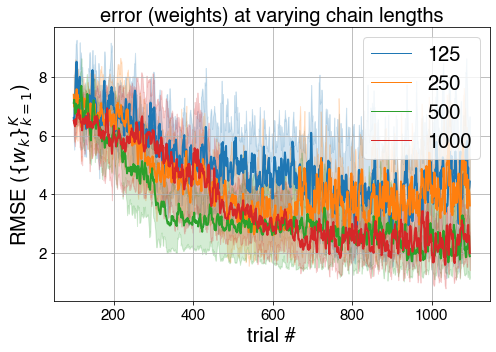

In [7]:
%matplotlib inline

chain_lengths = [25, 150, 400, 900]
burnin = 100

# Plotting error in weights
num_repeats = 5
error_in_weights=[]

for chain_length in chain_lengths:
    for seed in np.arange(num_repeats):
        error_in_weights_this_len = np.load("Results_IOHMM/infomax_gibbs_vary_v2_errorinweights_atseed"+str(seed)+"_burnin_"+str(burnin)+"_chain_"+str(chain_length)+".npy")
        error_in_weights_this_len = np.convolve(error_in_weights_this_len, np.ones(5)/5, mode='valid') 
        num_trials = error_in_weights_this_len.shape[0]
        error_in_weights = error_in_weights + error_in_weights_this_len.tolist()


# repeat each chain length for num_trials times
chain_labels = []
for chain_length in chain_lengths:
    chain_labels = chain_labels + [str(chain_length+100)]*num_trials*num_repeats
trials = (np.arange(num_trials)+init_trials).tolist()*len(chain_lengths)*num_repeats

    
weights_list = {"trial #": trials, "chain length": chain_labels, "RMSE ($\{w_k\}_{k=1}^K$)": error_in_weights}
df = pd.DataFrame(weights_list, columns = ['trial #', 'chain length', 'RMSE ($\{w_k\}_{k=1}^K$)'])
fig, ax = plt.subplots(figsize = (7,5))
sns.lineplot(x="trial #", y="RMSE ($\{w_k\}_{k=1}^K$)", hue="chain length", data=df, ax = ax,  linewidth=2, )
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels)
ax.set_title("error (weights) at varying chain lengths", fontsize=MEDIUM_SIZE)
# ax.get_legend().remove()
plt.xticks()
plt.yticks()
plt.tight_layout()
plt.grid()
plt.savefig("Figs_IOHMM/rmse_weights_varying_lengths.png", dpi=400)
plt.savefig("Figs_IOHMM/rmse_weights_varying_lengths.svg")    

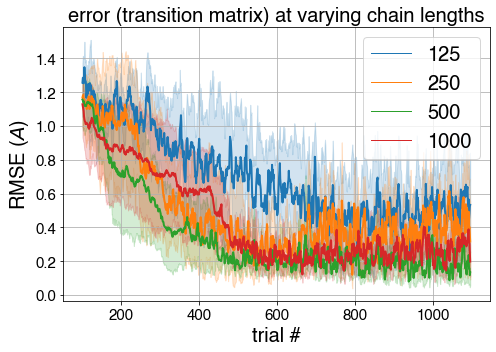

In [8]:
# Plotting error in weights
num_repeats = 5
error_in_weights=[]

for chain_length in chain_lengths:
    for seed in np.arange(num_repeats):
        error_in_weights_this_len = np.load("Results_IOHMM/infomax_gibbs_vary_v2_errorinPs_atseed"+str(seed)+"_burnin_"+str(burnin)+"_chain_"+str(chain_length)+".npy")
        error_in_weights_this_len = np.convolve(error_in_weights_this_len, np.ones(5)/5, mode='valid') 
        num_trials = error_in_weights_this_len.shape[0]
        error_in_weights = error_in_weights + error_in_weights_this_len.tolist()


# repeat each chain length for num_trials times
chain_labels = []
for chain_length in chain_lengths:
    chain_labels = chain_labels + [str(chain_length+100)]*num_trials*num_repeats
trials = (np.arange(num_trials)+init_trials).tolist()*len(chain_lengths)*num_repeats
    
weights_list = {"trial #": trials, "chain length": chain_labels, "RMSE ($A$)": error_in_weights}
df = pd.DataFrame(weights_list, columns = ['trial #', 'chain length', 'RMSE ($A$)'])
fig, ax = plt.subplots(figsize = (7,5))
sns.lineplot(x="trial #", y="RMSE ($A$)", hue="chain length", data=df, ax = ax,  linewidth=2, )
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels)
ax.set_title("error (transition matrix) at varying chain lengths", fontsize = MEDIUM_SIZE)
# ax.get_legend().remove()
plt.xticks()
plt.yticks()
plt.grid()
plt.tight_layout()
plt.savefig("Figs_IOHMM/rmse_A_varying_lengths.png", dpi=400)
plt.savefig("Figs_IOHMM/rmse_A_varying_lengths.svg", dpi=400)

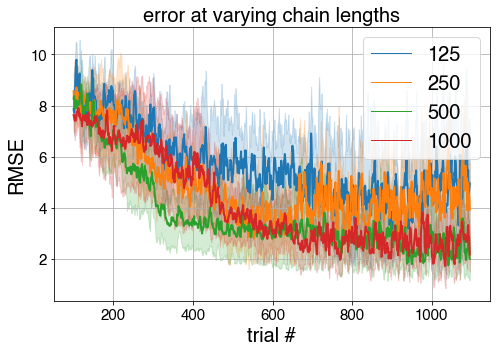

In [9]:
# Plotting total error in parameters

num_repeats = 5
error_in_weights=[]

for chain_length in chain_lengths:
    for seed in np.arange(num_repeats):
        error_in_weights_this_len = np.load("Results_IOHMM/infomax_gibbs_vary_v2_errorinweights_atseed"+str(seed)+"_burnin_"+str(burnin)+"_chain_"+str(chain_length)+".npy")+ \
        np.load("Results_IOHMM/infomax_gibbs_vary_v2_errorinPs_atseed"+str(seed)+"_burnin_"+str(burnin)+"_chain_"+str(chain_length)+".npy")
        error_in_weights_this_len = np.convolve(error_in_weights_this_len, np.ones(5)/5, mode='valid') 
        num_trials = error_in_weights_this_len.shape[0]
        error_in_weights = error_in_weights + error_in_weights_this_len.tolist()


# repeat each chain length for num_trials times
chain_labels = []
for chain_length in chain_lengths:
    chain_labels = chain_labels + [str(chain_length+100)]*num_trials*num_repeats
trials = (np.arange(num_trials)+init_trials).tolist()*len(chain_lengths)*num_repeats

weights_list = {"trial #": trials, "chain length": chain_labels, "RMSE": error_in_weights}
df = pd.DataFrame(weights_list, columns = ['trial #', 'chain length', 'RMSE'])
fig, ax = plt.subplots(figsize = (7,5))
sns.lineplot(x="trial #", y="RMSE", hue="chain length", data=df, ax = ax,  linewidth=2,)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels)
ax.set_title("error at varying chain lengths", fontsize=MEDIUM_SIZE)
# ax.get_legend().remove()
plt.xticks()
plt.yticks()
plt.tight_layout()
plt.grid()
plt.savefig("Figs_IOHMM/rmse_varying_lengths.png", dpi=400)
plt.savefig("Figs_IOHMM/rmse_varying_lengths.svg")    

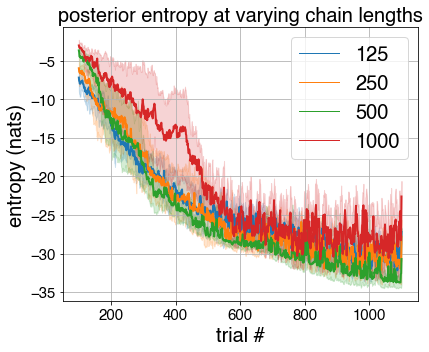

In [12]:
from scipy import signal
# Plotting posterior covariance
num_repeats = 5
error_in_weights=[]

chain_lengths = [100, 150, 400, 900]

for chain_length in chain_lengths:
    for seed in np.arange(num_repeats):
        error_in_weights_this_len = np.load("Results_IOHMM/infomax_gibbs_vary_v2_posteriorcovariance_atseed"+str(seed)+"_burnin_"+str(burnin)+"_chain_"+str(chain_length)+".npy")
        error_in_weights_this_len = signal.medfilt(error_in_weights_this_len, 5)
        num_trials = error_in_weights_this_len.shape[0]
        error_in_weights = error_in_weights + error_in_weights_this_len.tolist()


chain_labels = []
for chain_length in chain_lengths:
    if chain_length == 100:
        chain_length = 125
        chain_labels = chain_labels + [str(chain_length)]*num_trials*num_repeats
    else:
        chain_labels = chain_labels + [str(chain_length+100)]*num_trials*num_repeats
trials = (np.arange(num_trials)+init_trials).tolist()*len(chain_lengths)*num_repeats

    
weights_list = {"trial #": trials, "chain length": chain_labels, "entropy (nats)": error_in_weights}
df = pd.DataFrame(weights_list, columns = ['trial #', 'chain length', 'entropy (nats)'])
fig, ax = plt.subplots(figsize = (6,5))
sns.lineplot(x="trial #", y="entropy (nats)", hue="chain length", data=df, ax = ax,  linewidth=2,)
handles, labels = ax.get_legend_handles_labels()
# add title
ax.set_title("posterior entropy at varying chain lengths", fontsize=MEDIUM_SIZE)
ax.legend(handles=handles, labels=labels)
# ax.get_legend().remove()
plt.xticks()
plt.yticks()
plt.tight_layout()
plt.grid()

# save figure in ong and svg
plt.savefig("Figs_IOHMM/posterior_entropy_varying_lengths.png", dpi=400)
plt.savefig("Figs_IOHMM/posterior_entropy_varying_lengths.svg", dpi=400)